# Analysing ~~Penguins~~ Relationships

This notebook explores relationships in data and the process for
analysing relationships, using the **TidyTuesday Palmer Penguins**
dataset. We’ll cover:

-   Variable types & framing
-   Visual exploration of relationships
-   Calculating correlation
-   Spotting and diagnosing non‑linear patterns

## Why Analyse Relationships?

We’ve learned to ask “Does A differ from B?”, but now we can ask, “How
do two measures move together?”

In this session, we’ll explore the penguins dataset to see how body mass
relates to flipper length, how bill length relates to bill depth, and
how to identify relationships between continuous traits.

## Variables & Framing

In our previous session, comparing samples, we were comparing the
average value of a continuous variable by groups (categorical
variables).

Here we will compare two continuous variables, considering how one
variable (the outcome) changes in response to changes in the other
variable (the predictor).

There is only a subtle difference between the idea of comparing samples
and analysing relationships. You can frame a comparison between groups
as analysing the relationship between the groups and the continuous
variable, but you are still comparing the average value and dispersion
for each group and inferring the relationship (or association) from
this. When comparing two continuous variables, you can’t reduce either
to their average, and are instead making statements about the way they
vary together.

**Question:** What relationships have you explored in your own work?

## Load & Preview Penguins Data

In [1]:
import pandas as pd

# load penguins data from TidyTuesday URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-15/penguins.csv'
penguins_raw = pd.read_csv(url)
penguins_raw.head()

**Focus:** Drop rows with missing values in key numeric columns.

In [2]:
# focus on key continuous variables and drop missing values
df = penguins_raw.dropna()
df.shape

(333, 8)

## Visualing Relationships

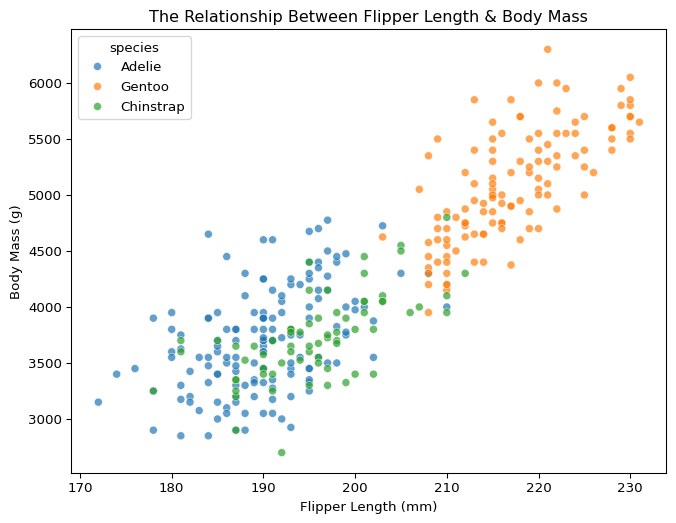

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter of flipper length vs. body mass
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='flipper_len',
    y='body_mass',
    hue='species',
    alpha=0.7
)
plt.title('The Relationship Between Flipper Length & Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

**Questions:**

-   What pattern do you see?
-   How does body mass change when flipper length increases, according
    to this plot?
-   Are there differences by species?

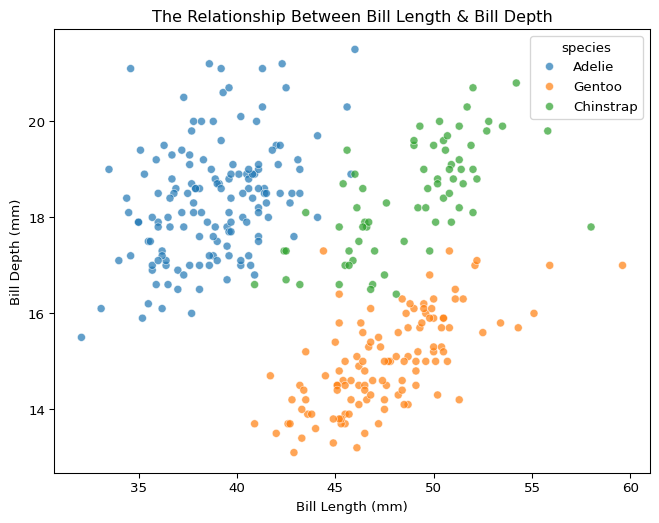

In [4]:
# scatter of bill length vs. bill depth
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='bill_len',
    y='bill_dep',
    hue='species',
    alpha=0.7
)
plt.title('The Relationship Between Bill Length & Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

**Questions:**

-   What pattern do you see?
-   How does bill depth change when bill length increases, according to
    this plot?
-   Are there differences by species?

## Computing Correlations

### Pairwise Correlation

We can compute the correlation between two variables, using
`scipy.stats`.

In [5]:
from scipy.stats import pearsonr

r, p = pearsonr(df['flipper_len'], df['body_mass'])
print(f"Correlation (r) = {r:.2f}")

Correlation (r) = 0.87

A correlation of 0.87 is very strong. There is clearly a very strong
association between flipper length and body mass. However, we can’t
claim that flipper length causes body mass just based off this.
Correlation does not imply causation[1].

When we visualised the relationship between bill length and bill depth,
there appeared to be a grouping structure going on that complicated
things, and the overall relationship appeared pretty noisy.

[1] Correlation might not imply causation, but it is important to
realise that the presence of correlation does not mean causation is
*not* present. You just can’t conclude causation exists simply because
you observe a correlation.

In [6]:
r, p = pearsonr(df['bill_len'], df['bill_dep'])
print(f"Correlation (r) = {r:.2f}")

Correlation (r) = -0.23

As a result, the correlation score is much lower. A correlation of -0.23
tells us two things:

-   The negative correlation means that when bill length increases, bill
    depth tends to decrease.
-   The weaker correlation suggests that this decrease is a lot noisier,
    and it is much harder to estimate a penguin’s bill depth using their
    bill length.

A correlation of +/- ~0.2 doesn’t necessarily mean there is no
relationship. There are lots of ways correlation can mislead, because it
is a limited measure. Visualising the relationship between bill length
and bill depth showed us that species is highly relevant, and not
factoring this in limits what we can say about this relationship.

### Correlation Matrix

We may be interested in the pairwise correlation between multiple
variables. If so, computing each correlation between pairs of variables
is very cumbersome. Instead, we can compute a correlation matrix.

In [7]:
# compute correlation matrix
(
    df.select_dtypes(include='number')
    .corr()
    .round(2)
)

We can also visualise a correlation matrix.

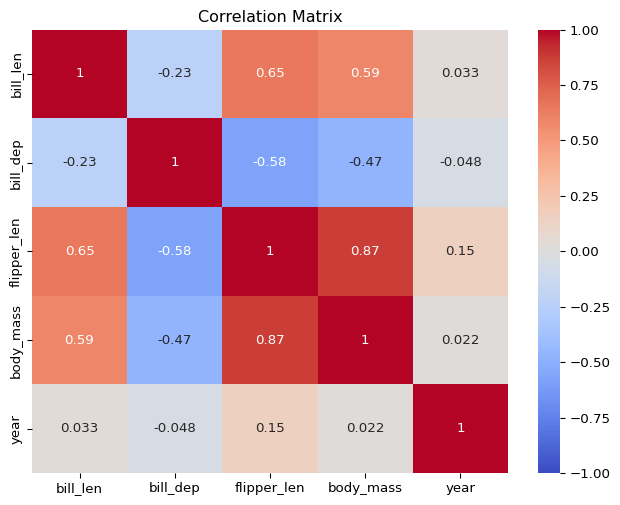

In [8]:
# add correlation matrix to summarise relationships
corr_matrix = df.select_dtypes(include='number').corr()
# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

If you are concerned with a certain outcome and you want to quickly look
at the correlation between all other continuous variables and the
outcome, you can also compute this.

In [9]:
# correlations of all numeric variables with body mass
(
    df.select_dtypes(include='number')
    .corr()['body_mass']
    .drop('body_mass')
    .round(2)
)

bill_len       0.59
bill_dep      -0.47
flipper_len    0.87
year           0.02
Name: body_mass, dtype: float64

## Correlation’s Limitations

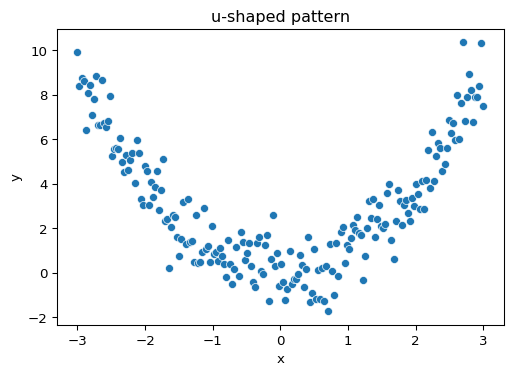

In [10]:
import numpy as np

# simulate a u‑shaped relationship example
x_sim = np.linspace(-3, 3, 200)
y_sim = x_sim**2 + np.random.normal(0, 1, 200)
sim = pd.DataFrame({'x': x_sim, 'y': y_sim})

plt.figure(figsize=(6, 4))
sns.scatterplot(data=sim, x='x', y='y')
plt.title('u-shaped pattern')
plt.show()

In [11]:
r, p = pearsonr(sim['x'], sim['y'])
print(f"Correlation (r) = {r:.2f}")

Correlation (r) = -0.02

**Takeaway:** Pearson’s *r* misses non-linear relationships

## Visualising Linear Regressions

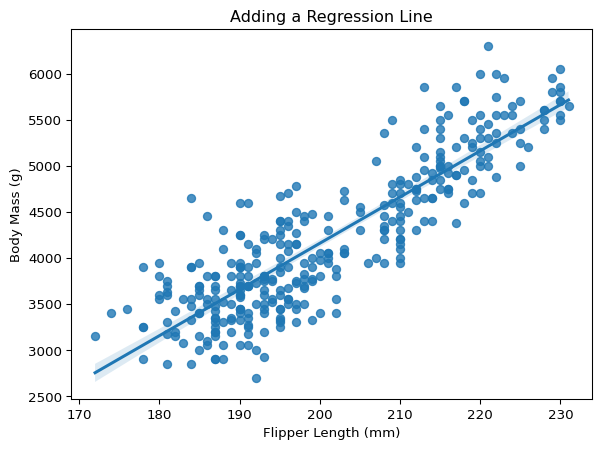

In [12]:
# add linear fit line
sns.regplot(
    data=df,
    x='flipper_len',
    y='body_mass',
    scatter=True,
    ci=95
)
plt.title('Adding a Regression Line')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

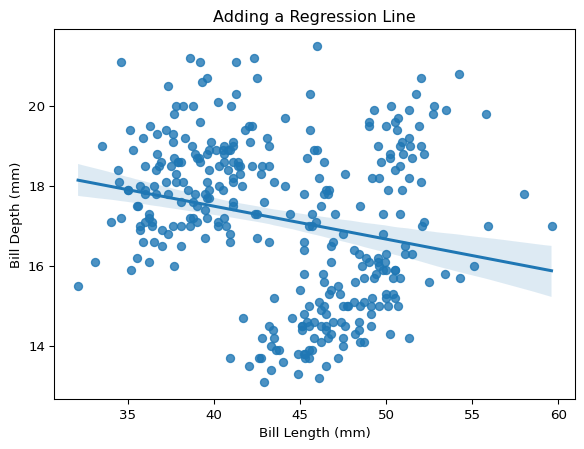

In [13]:
# add linear fit line
sns.regplot(
    data=df,
    x='bill_len',
    y='bill_dep',
    scatter=True,
    ci=95
)
plt.title('Adding a Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

## Plotted Regression Limitations

These plots points to another limitation with Pearson’s *r* that also
applies to regression plots. Grouping structures!

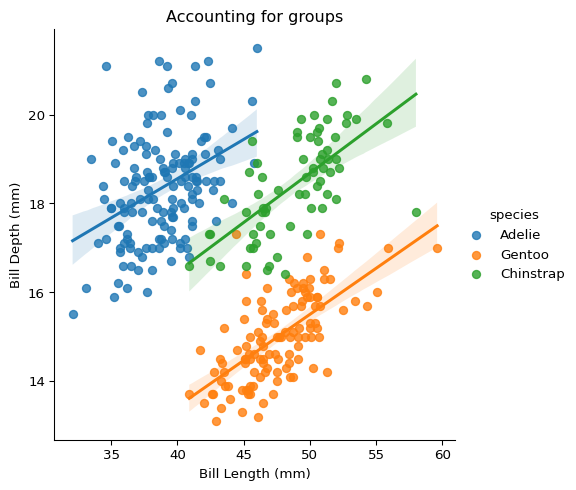

In [14]:
sns.lmplot(data=df, x="bill_len", y="bill_dep", hue="species")

plt.title('Accounting for groups')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

## 8. Wrap‑Up & Bridge to Regression

-   Correlation quantifies strength of linear link.
-   Only linear, pairwise, no adjustment for other variables.
-   Correlation does not imply causation (but does not *not* imply
    causation, either).